# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📥 Step 1: Load the Dataset

In [7]:
data = pd.read_csv(r"E:\PROJECTS\Breast_Cancer\Cancer_Data.csv")

# Display the shape of the dataset (rows, columns)
print(f"Dataset shape: {data.shape}")

# View the first 5 rows to verify successful loading
data.head()

Dataset shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 🔍 Step 2: Explore the Dataset

----- Data Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

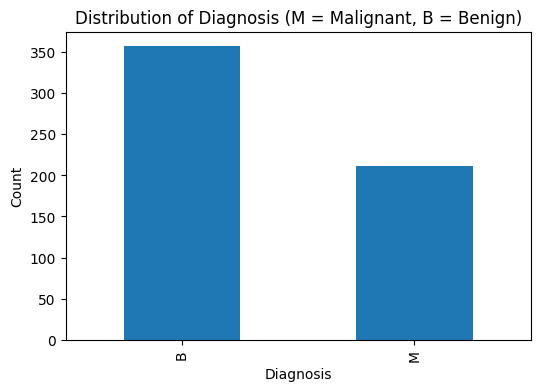

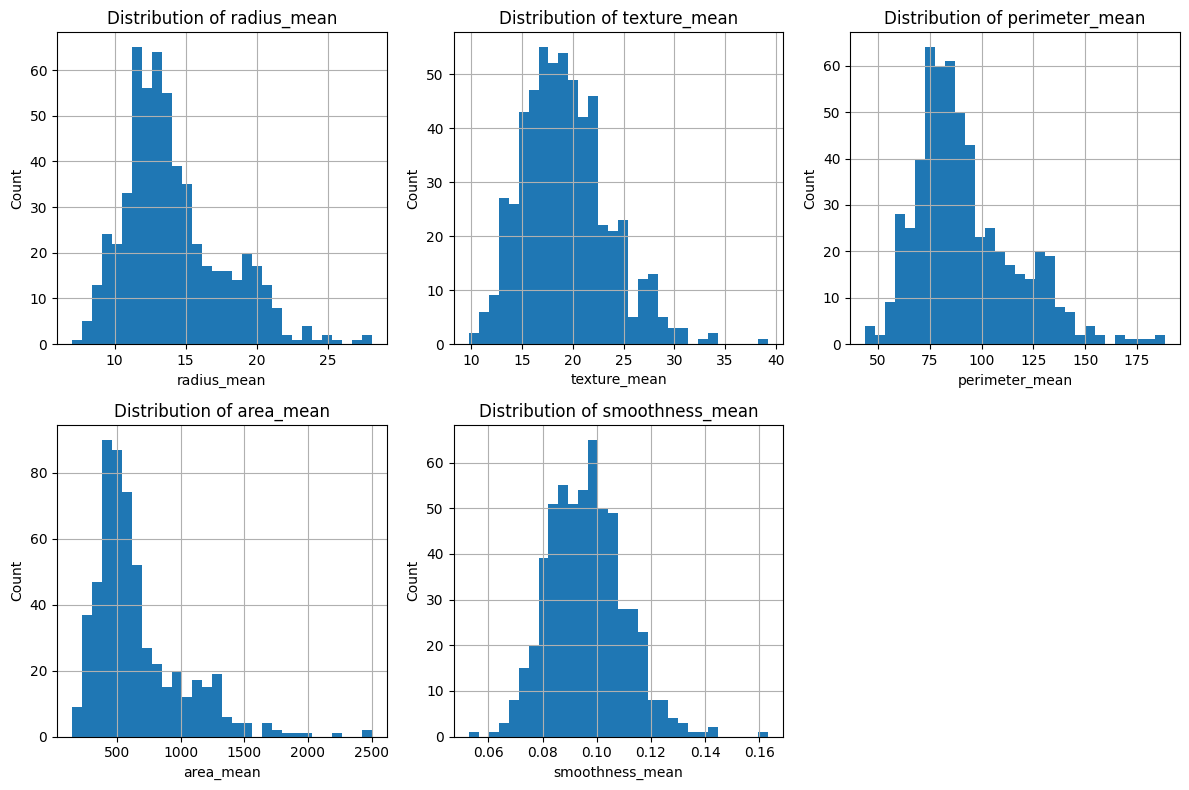

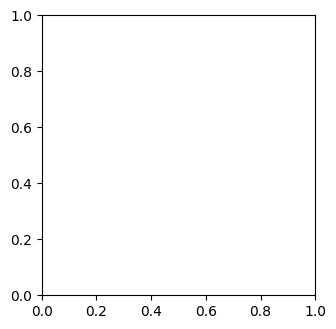

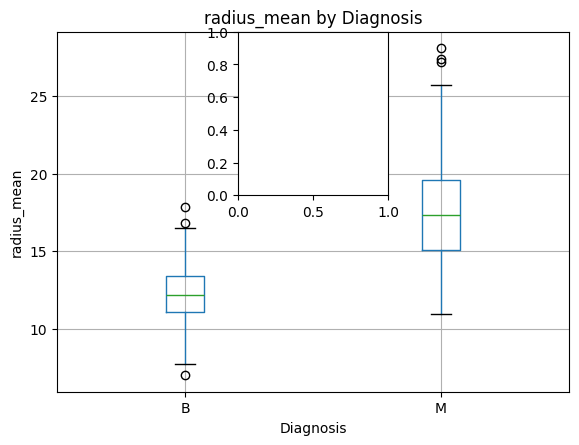

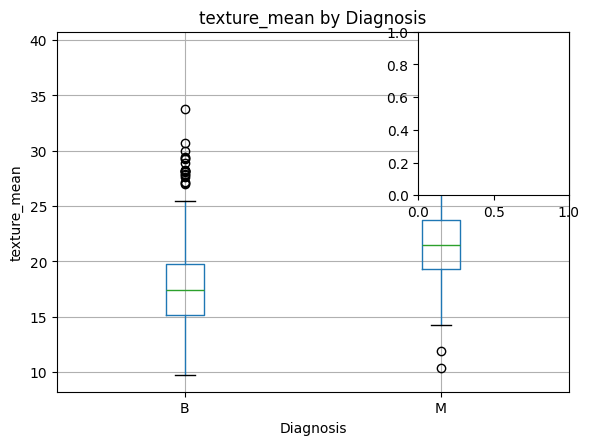

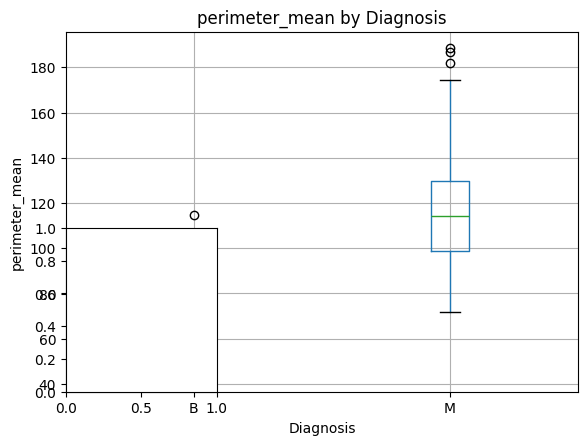

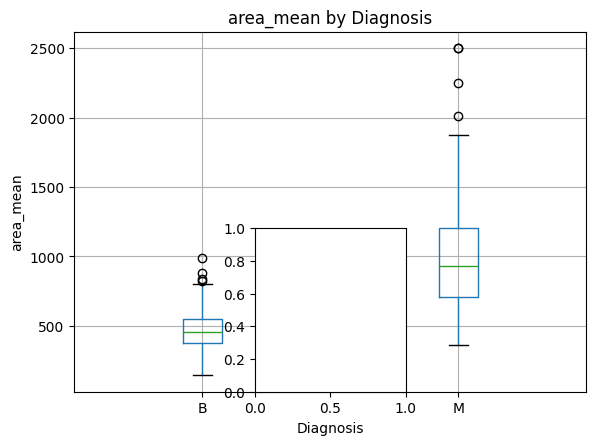

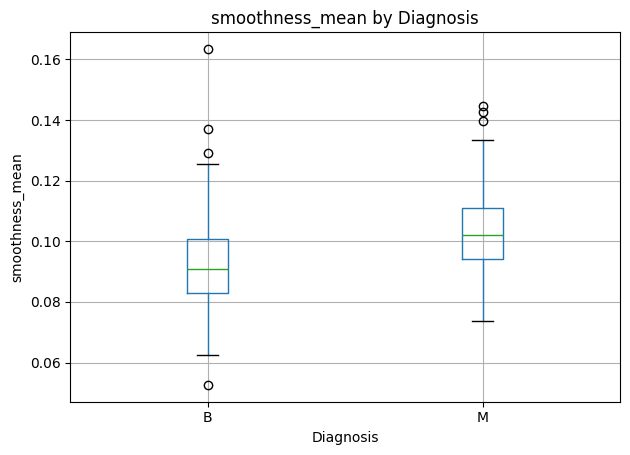

In [9]:

# Step 2: Explore the Dataset
# 2.1: Inspect data types and non-null counts
print("----- Data Info -----")
data.info()

# 2.2: View basic statistical summary for numeric features
print("\n----- Statistical Summary -----")
data.describe()

# 2.3: Check for missing values per column
print("\n----- Missing Values -----")
print(data.isnull().sum())

# 2.4: Examine target class distribution
print("\n----- Class Distribution -----")
print(data['diagnosis'].value_counts())

# 2.5: Visualize class balance
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
data['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis (M = Malignant, B = Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# 2.6: Plot distributions for selected features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

# Histograms of feature distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    data[feature].hist(bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2.7: Boxplots of features by diagnosis
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    data.boxplot(column=feature, by='diagnosis')
    plt.title(f'{feature} by Diagnosis')
    plt.suptitle('')  # Remove default title
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()



## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [11]:
# 3.1: Drop unnecessary columns (e.g., 'id', 'Unnamed: 32')
# Using `errors='ignore'` to avoid errors if column not present
data_clean = data.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# 3.2: Check missing values before handling
print("----- Missing Values Before Cleanup -----")
print(data_clean.isnull().sum())

# 3.3: Handle missing values
# Option A: Drop rows with any missing values
data_clean = data_clean.dropna()
# Option B (alternative): Fill missing values with median
# median_vals = data_clean.median()
# data_clean = data_clean.fillna(median_vals)

# 3.4: Verify no missing values remain
print("\n----- Missing Values After Cleanup -----")
print(data_clean.isnull().sum())

# Display cleaned data shape and preview
print(f"Cleaned data shape: {data_clean.shape}")
data_clean.head()

print("\nRemaining Columns:")
print(data.columns)


----- Missing Values Before Cleanup -----
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

----- Missing Values After Cleanup -----
diag

## 📊 Step 4: Visualize the Data

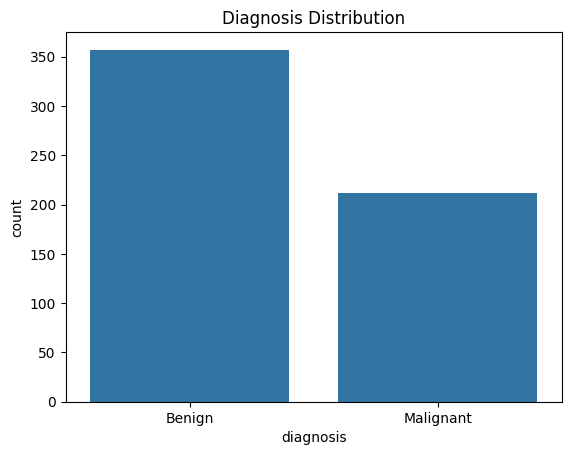

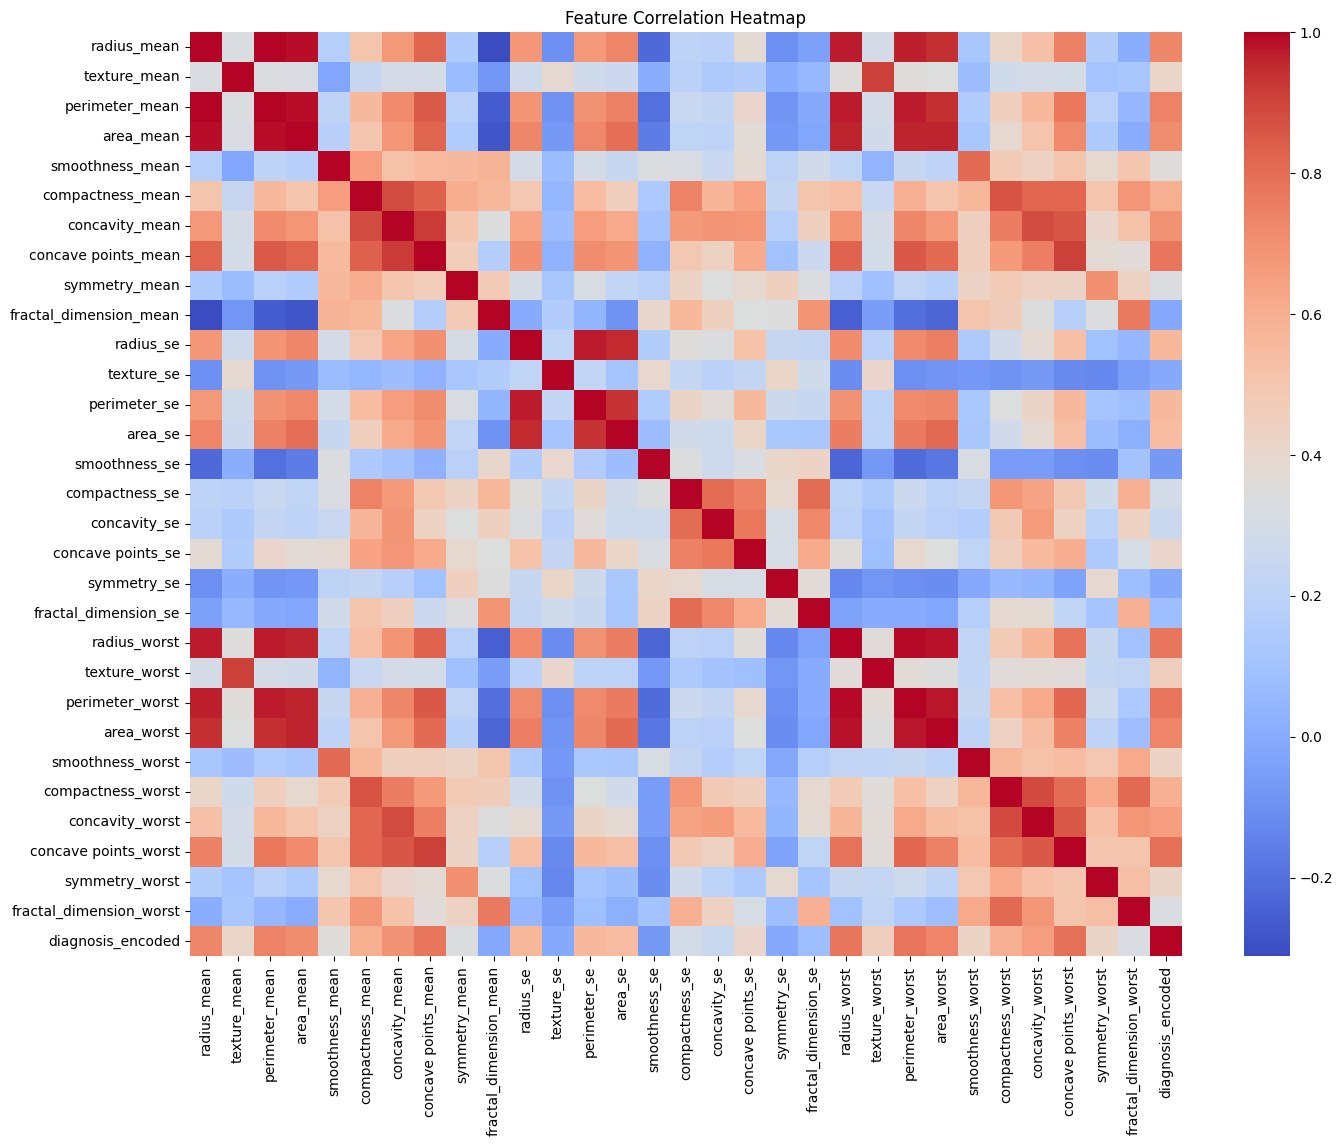

<Figure size 1000x1000 with 0 Axes>

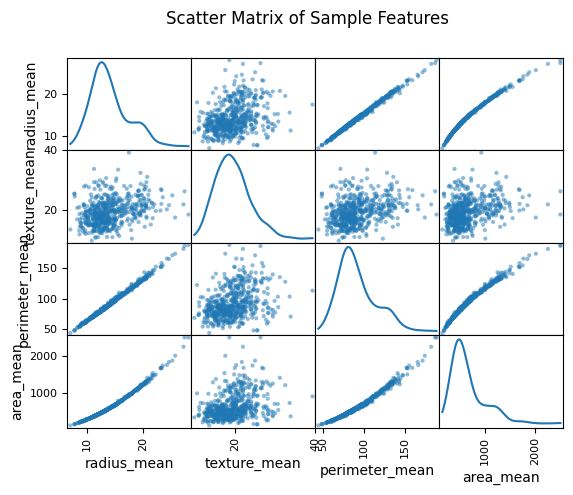

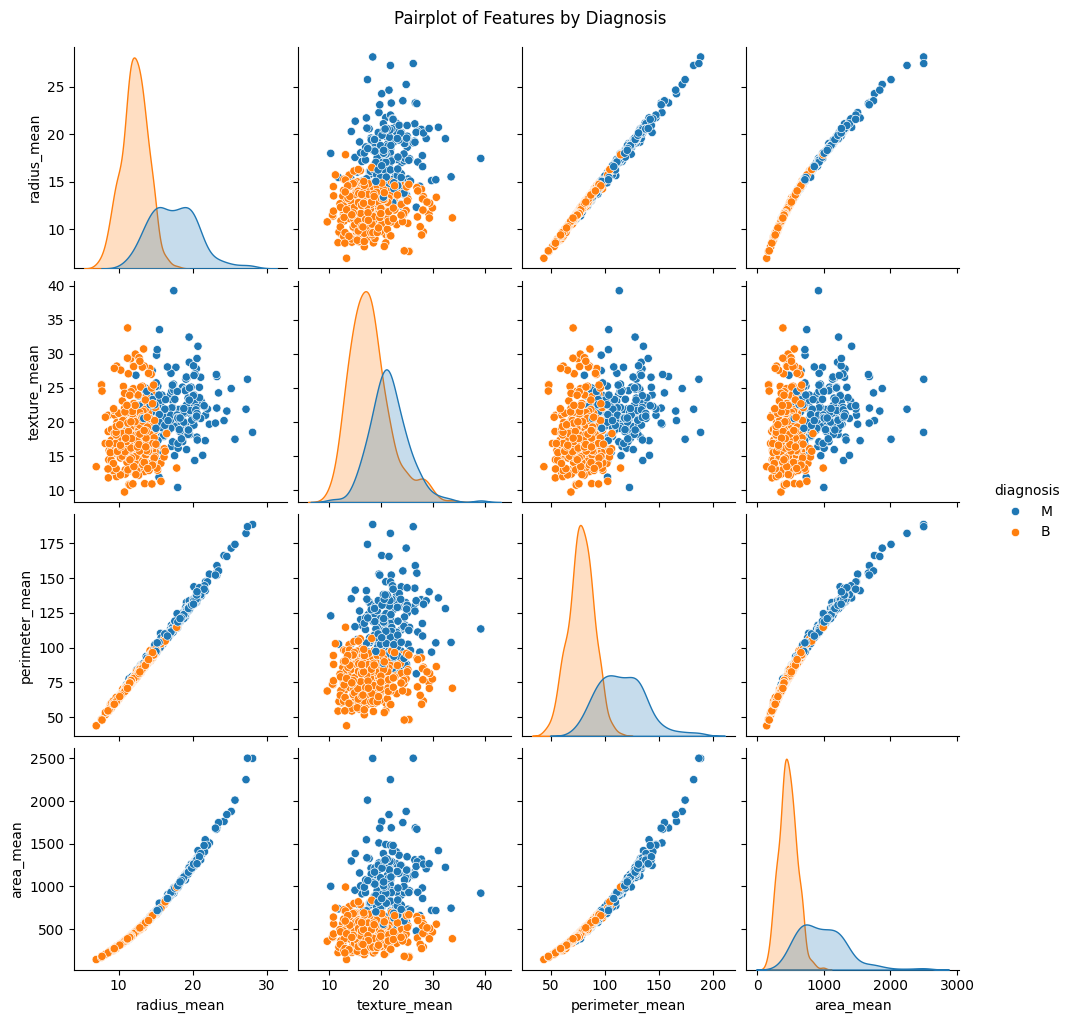

In [14]:
# Convert 'diagnosis' to numeric (0 = Benign, 1 = Malignant)
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Countplot
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Distribution')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()

data_viz = data_clean.copy()
data_viz['diagnosis_encoded'] = data_viz['diagnosis'].map({'M': 1, 'B': 0})

# 4.1: Correlation Heatmap (drop non-numeric or include encoded)
corr_matrix = data_viz.drop(['diagnosis'], axis=1).corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# 4.2: Scatter Matrix for Sample Features
sample_features = ['radius_mean','texture_mean','perimeter_mean','area_mean']
plt.figure(figsize=(10,10))
scatter_matrix(data_clean[sample_features], diagonal='kde', alpha=0.5)
plt.suptitle('Scatter Matrix of Sample Features')
plt.show()

# 4.3: Pairplot Colored by Diagnosis
sns.pairplot(
    data_clean[sample_features + ['diagnosis']],
    hue='diagnosis',
    vars=sample_features,
    diag_kind='kde'
)
plt.suptitle('Pairplot of Features by Diagnosis', y=1.02)
plt.show()

## ⚙️ Step 5: Preprocess the Data

In [33]:
# Step 5: Preprocess the Data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 5.1: Encode the target variable
target_encoder = LabelEncoder()
data_clean['diagnosis_encoded'] = target_encoder.fit_transform(data_clean['diagnosis'])  # M=1, B=0

# 5.2: Separate features and target
y = data_clean['diagnosis_encoded']
X = data_clean.drop(['diagnosis', 'diagnosis_encoded'], axis=1)

# 5.3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# 5.4: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame if needed
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Preprocessing complete. Features have been scaled and data split.")

Training set shape: (455, 30), (455,)
Test set shape: (114, 30), (114,)
Preprocessing complete. Features have been scaled and data split.


## 🤖 Step 6: Train a Machine Learning Model

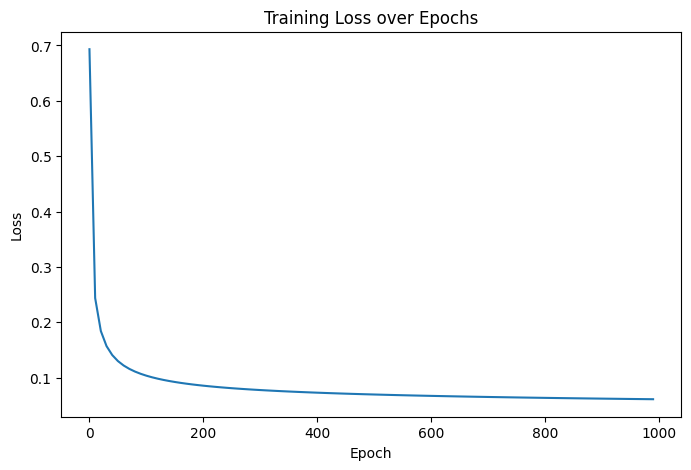

In [34]:
# Step 6: Train a Logistic Regression Model with Epoch-based Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

# 6.0: Prepare data for manual gradient descent (numpy arrays)
X_train_np = X_train.values  # shape (n_samples, n_features)
X_test_np = X_test.values
y_train_np = y_train.values.reshape(-1, 1)  # shape (n_samples, 1)
y_test_np = y_test.values.reshape(-1, 1)

# 6.1: Add bias term (column of ones)
m, n = X_train_np.shape
Xb_train = np.hstack([np.ones((m, 1)), X_train_np])
m_test = X_test_np.shape[0]
Xb_test = np.hstack([np.ones((m_test, 1)), X_test_np])

# 6.2: Initialize weights and hyperparameters
w = np.zeros((n + 1, 1))  # including bias
learning_rate = 0.1
n_epochs = 1000
loss_history = []

# 6.3: Gradient descent loop
for epoch in range(n_epochs):
    # Forward pass: linear combination and sigmoid activation
    z = Xb_train.dot(w)
    p = 1 / (1 + np.exp(-z))

    # Compute gradient of binary cross-entropy loss
    grad = (1 / m) * Xb_train.T.dot(p - y_train_np)

    # Update weights
    w -= learning_rate * grad

    # (Optional) track loss
    if epoch % 10 == 0:
        loss = - (1 / m) * np.sum(
            y_train_np * np.log(p + 1e-9) + (1 - y_train_np) * np.log(1 - p + 1e-9)
        )
        loss_history.append((epoch, loss))

# 6.4: Plot loss over epochs
epochs, losses = zip(*loss_history)
plt.figure(figsize=(8,5))
plt.plot(epochs, losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LogisticRegression(
        class_weight='balanced',
        C=1.0,
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    )
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


## 🧪 Step 7: Evaluate the Model

Manual Logistic Regression Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
[[72  0]
 [ 2 40]]


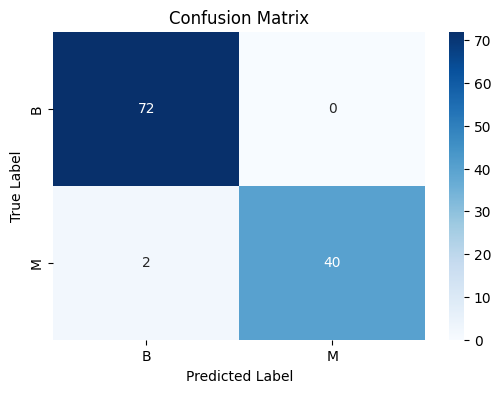

In [54]:
z_test = Xb_test.dot(w)
p_test = 1 / (1 + np.exp(-z_test))
y_pred_np = (p_test >= 0.5).astype(int)

y_pred = y_pred_np.flatten()
y_true = y_test_np.flatten()

acc = accuracy_score(y_true, y_pred)
print(f"Manual Logistic Regression Accuracy: {acc:.4f}")
print('Classification Report:')
print(classification_report(y_true, y_pred, target_names=target_encoder.classes_))

cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy